# FINANCE DATA PROJECT

This project we will focus on exploratory data analysis of stock prices. We'll focus on bank stocks and see how they progressed throughout the financial crisis all the way to early 2020.

### Import necessary packages

In this exploratory data analysis, we will use pandas, numpy, datetime, matplotlib, seaborn, and pandas_datareader modules. These modules are preinstalled using pip.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data, wb
%matplotlib inline
sns.set()

### Get the stock data
Using the pandas_datareader module, we will get the information for the following banks:
- Bank of America
- CitiGroup
- Capital One
- JPMorgan Chase
- Wells Fargo
- Keycorp

In [57]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2020,1,1)

In [58]:
# BofA
#BAC = data.DataReader('BAC','yahoo', start, end)
# CitiGroup
#C = data.DataReader('C','yahoo', start, end)
# Capital One
#COF = data.DataReader('COF','yahoo', start, end)
# JPMorgan Chase
#JPM = data.DataReader('JPM','yahoo', start, end)
# Wells Fargo
#WFC = data.DataReader('WFC','yahoo', start, end)
# KeyCorp
#KEY = data.DataReader('KEY','yahoo', start, end)

In [59]:
ticker = ['BAC', 'C', 'COF', 'JPM', 'KEY', 'WFC']

In [60]:
bank_stocks = pd.read_pickle("https://github.com/mustaqimrahm/dataset/blob/main/bank_stocks?raw=true")

### Take a look on the bank_stocks data.

In [64]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.280807  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.916729  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.960411  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.909451  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.931290  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker        KEY                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   33.180000  33.669998  1847100.0  21.695471  31.975000  31.195000   
2006-01-04   33.540001  33.880001  1815500.0  21.830795  31.820000  31.365000   
2006-01-05   33.849998  34.040001  2057000.0  21.933891  31.555000  31.309999   
2006-01-06   34.040001  34.049999  1290000.0  21.940325  31.775000  31.385000   
2006-01-09   34.000000  34.090000   997500.0  21.966105  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.613142  
2006-01-04   31.799999  31.530001  10870000.0  20.374050  
2006-01-05   31.500000  31.495001  10158000.0  20.351437  
2006-01-06   31.580000  31.680000   8403800.0  20.470978  
2006-01-09   31.674999  31.674999   5619600.0  20.467749  

[5 rows x 36 columns]

## Find the max close price for each bank's stock

Maximum closing price:

In [62]:
for tick in ticker:
    print(tick, bank_stocks[tick]['Close'].max().round(5))

BAC 54.9
C 564.09998
COF 105.71
JPM 139.39999
KEY 39.79
WFC 65.93


Minimum closing price:

In [66]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').min()

Bank Ticker
BAC     3.14
C      10.20
COF     8.31
JPM    15.90
KEY     4.60
WFC     8.12
dtype: float64

## Create a new empty DataFrame called returns. This df will contain the returns for each bank's stock. 

In [67]:
returns = pd.DataFrame()

In [68]:
for tick in ticker:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

Here is the brief overview of returns dataset.

In [21]:
returns.tail()

,BAC Return,C Return,COF Return,JPM Return,KEY Return,WFC Return
Date,,,,,,
2019-12-24,0.001422,-0.002159,0.000194,0.002770,0.004938,0.000186
2019-12-26,0.008518,0.015778,0.005148,0.010612,0.000983,0.006132
2019-12-27,-0.004786,-0.002004,-0.004639,0.000719,-0.004418,-0.004248
2019-12-30,-0.005658,-0.002008,-0.003495,-0.003665,-0.002959,-0.005935
2019-12-31,0.001991,0.004779,0.002631,0.005554,0.000989,0.003731


## Create a pairplot using seaborn of the returns dataframe.

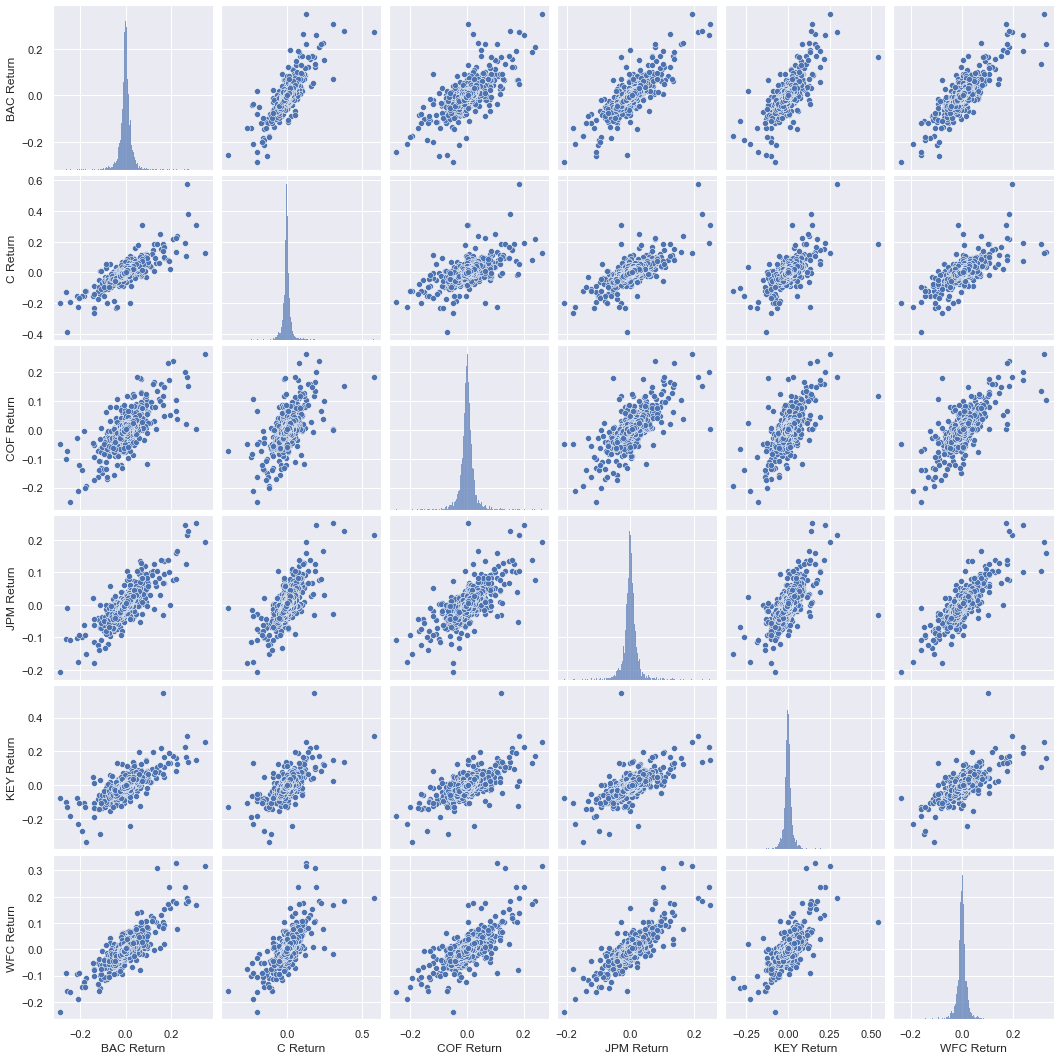

In [22]:
sns.pairplot(returns[1:])

## Using the returns dataframe, figure out on what dates each bank stock had the best and worst single day returns.

Best single day returns:

In [23]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
COF Return   2009-04-20
JPM Return   2009-01-20
KEY Return   2008-09-29
WFC Return   2009-01-20
dtype: datetime64[ns]

Worst single day returns:

In [24]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
COF Return   2009-04-09
JPM Return   2009-01-21
KEY Return   2008-10-14
WFC Return   2008-07-16
dtype: datetime64[ns]

## Take a look at the standard deviation of the returns. Which stock we classify as the riskiest over the time period? Which we would classify as the riskiest for the year 2015?

Standard Deviation of the returns over the time period.

In [25]:
returns.std()

BAC Return    0.032158
C Return      0.033750
COF Return    0.028472
JPM Return    0.024401
KEY Return    0.031552
WFC Return    0.026551
dtype: float64

Standard Deviation of the returns for the year 2019.

In [71]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
COF Return    0.016306
JPM Return    0.014017
KEY Return    0.017553
WFC Return    0.012591
dtype: float64

Stock return with highest deviation is considered the riskiest because the price of that particular stock has higher volatality compared to the other.

## Create a distplot using seaborn of the 2015 for KeyGroup

c:\users\nzrnm\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'KEY Return for the year 2015')

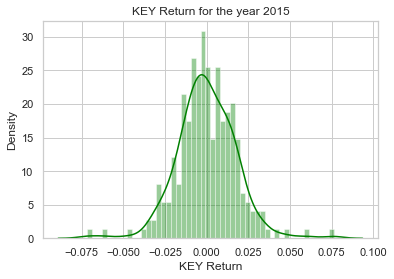

In [72]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['KEY Return'], color='green', bins=50 )
plt.title("KEY Return for the year 2015")

## Create a distplot using seaborn of the 2008 for CitiGroup

c:\users\nzrnm\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'C Return for the year 2008')

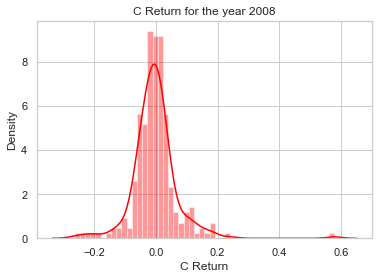

In [73]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red', bins=50 )
plt.title("C Return for the year 2008")

 ## Imports

Now we will import plotly and cufflinks as additional visualization modules.

In [74]:
sns.set_style('whitegrid')

import plotly
import cufflinks as cf
cf.go_offline()

## Create a line plot showing Close price for each bank.

The plot below shows the Closing price for each stock from 2006 to 2016. For the first graph, we use pandas built in plotting library while the second graph we use the plotly library.

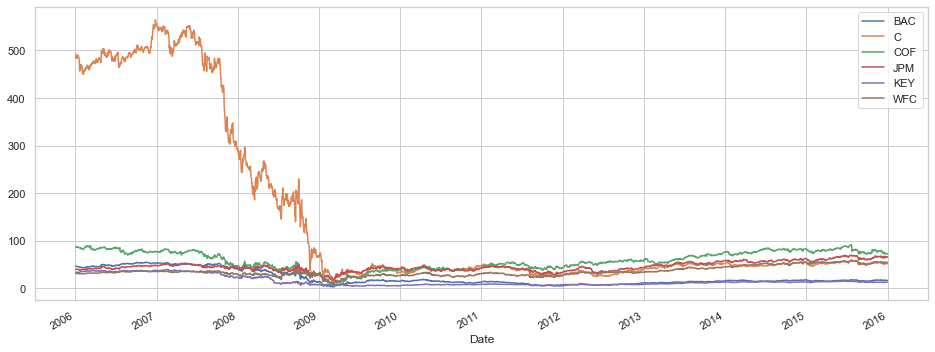

In [76]:
for tick in ticker:
    bank_stocks.loc['2006-01-01':'2015-12-31'][tick]['Close'].plot(label=tick, figsize=(16,6))
plt.legend()

In [32]:
bank_stocks.loc['2006-01-01':'2015-12-31'].xs(key = 'Close', axis=1, level='Stock Info').iplot()

# Moving Averages

### Plot the 30 day average against the Close Price for BofA stock for the year 2008

Stock Info,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,34.280807
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,33.916729
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,33.960411
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,33.909451
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,33.931290
...,...,...,...,...,...,...
2019-12-24,35.279999,35.119999,35.189999,35.220001,13805400.0,33.987522
2019-12-26,35.560001,35.290001,35.320000,35.520000,26992100.0,34.277020
2019-12-27,35.720001,35.259998,35.700001,35.349998,28111300.0,34.112965


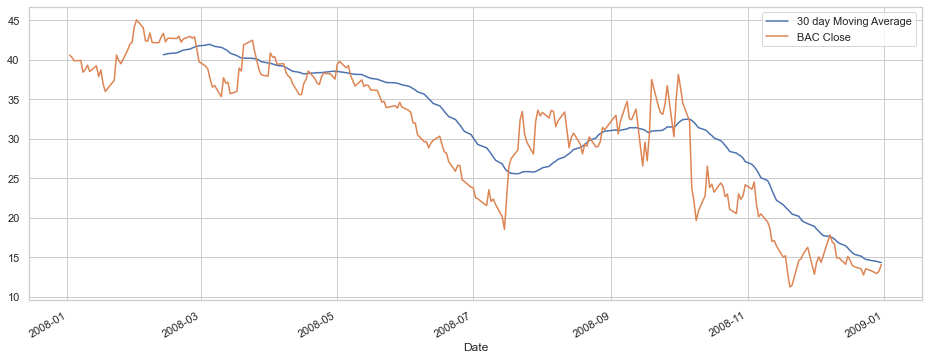

In [83]:
plt.figure(figsize=(16,6))
bank_stocks['BAC']['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 day Moving Average')
bank_stocks['BAC']['Close'].loc['2008-01-01':'2008-12-31'].plot(label='BAC Close')
plt.legend()

### Create a heatmap of the correlation between the stock Close Price.

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

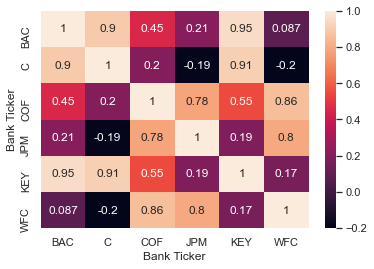

In [78]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

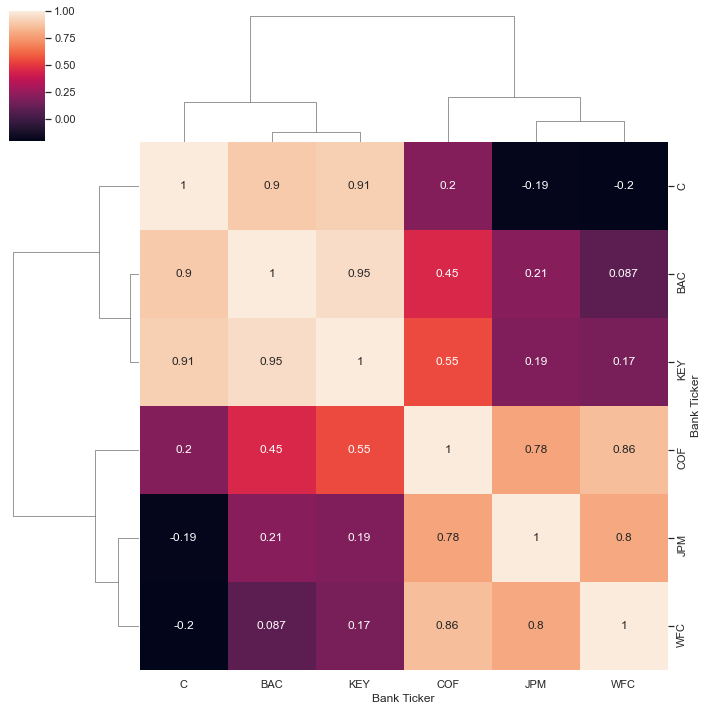

In [79]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)


### Create a candle plot of BofA stock from Jan 1st 2015 to Jan 1st 2016

In [80]:
bank_stocks.loc['2015-01-01':'2016-01-01']['BAC'].iplot(kind='candle')